In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from persim import PersImage
import gudhi
import os
import glob
from matplotlib import ticker, cm
from matplotlib.colors import LogNorm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time
from sklearn.decomposition import PCA
import matplotlib as mpl
from sklearn import preprocessing

In [2]:
#pdlocnum has format [[birth1, persistence1, counts1],...]
#bounds should be a list [bmin,bmax,pmin,pmax]
#bins should be a list [bbins, pbins]
def PerIm(pdloc,bounds,bins,stdev,res=1000):
    x = np.linspace(bounds[0], bounds[1], res)
    y = np.linspace(bounds[2], bounds[3], res)
    xx, yy = np.meshgrid(x, y, sparse=True)
    z=np.zeros([res,res])
    for i in np.arange(len(pdloc)):
        z=z+pdloc[i][1]*pdloc[i][2]*np.exp((-0.5*(xx-pdloc[i][0])**2-0.5*(yy-pdloc[i][1])**2)*stdev**-2)
    return z.reshape(bins[0],res//bins[0],bins[1],res//bins[1]).sum(3).sum(1)

In [1431]:
flist=np.sort(glob.glob("*3d_Ising*/6.0/*.txt"))

In [1432]:
for f in flist[50:100]:
    t0 = time.time()
    data = np.loadtxt(f, dtype=int)
    alpha_complex=gudhi.AlphaComplex(data)
    simplex_tree=alpha_complex.create_simplex_tree()
    PD=simplex_tree.persistence()
    PD0=[]
    PD1=[]
    PD2=[]
    for elm in PD:
        if elm[0]==1:
            PD1.append((elm[1][0],elm[1][1]-elm[1][0]))
        elif elm[0]==2:
            PD2.append((elm[1][0],elm[1][1]-elm[1][0]))
        else:
            if elm[1][1]!=float('inf'):
                PD0.append((elm[1][0],elm[1][1]-elm[1][0]))
    PD0=np.round(PD0,decimals=5)
    PD1=np.round(PD1,decimals=5)
    PD2=np.round(PD2,decimals=5)
    loc,counts=np.unique(PD0,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD0.dat",toSave)
    loc,counts=np.unique(PD1,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD1.dat",toSave)
    loc,counts=np.unique(PD2,axis=0,return_counts=True)
    toSave=np.array([[loc[i][0],loc[i][1],counts[i]] for i in np.arange(len(counts))])
    np.savetxt(f[:len(f)-4]+"PD2.dat",toSave)
    print(f, time.time() - t0)

Data_3d_Ising_Wolff_N=15_K=20\6.0\1552852415.txt 4.270625591278076
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552852546.txt 3.659283399581909
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552852659.txt 3.5135385990142822
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552852787.txt 3.559474468231201
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552852914.txt 3.5315606594085693
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552853048.txt 3.8467013835906982
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552853172.txt 3.5165512561798096
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552853295.txt 3.5704567432403564
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552853400.txt 3.777925968170166
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552853519.txt 3.5126025676727295
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552853643.txt 3.8696746826171875
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552853764.txt 3.674172878265381
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552853891.txt 4.260670900344849
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552854000.txt 3.6282949447631836
Data_3d_Ising_Wolff_N=15_K=20\6.0\1552854119.txt 3.575

In [5]:
fPD1list=np.sort(glob.glob("*3d_Ising*/*/*PD1.dat"))
TPD1list=[]
for f in fPD1list:
    if f[33]=='\\':
        TPD1list.append(float(f[30:33]))
    else:
        TPD1list.append(float(f[30:34]))

fPD2list=np.sort(glob.glob("*3d_Ising*/*/*PD2.dat"))
TPD2list=[]
for f in fPD2list:
    if f[33]=='\\':
        TPD2list.append(float(f[30:33]))
    else:
        TPD2list.append(float(f[30:34]))

In [6]:
pds1=[np.loadtxt(f) for f in fPD1list]

In [7]:
pds2=[np.loadtxt(f) for f in fPD2list]

In [160]:
bounds=[0,5,0,5]
bins=[10,10]
res=bins[0]*10

imgs1=[PerIm(pd,bounds,bins,1,res=res) for pd in pds1]
imgs2=[PerIm(pd,bounds,bins,1,res=res) for pd in pds2]

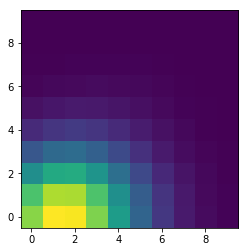

In [161]:
plt.imshow(imgs2[-1],origin='lower')

In [162]:
imgs1_array=np.array([img.flatten() for img in imgs1])
imgs2_array=np.array([img.flatten() for img in imgs2])

In [236]:
Tcutoff=4.512
labels1=[int(t<Tcutoff) for t in TPD1list]
labels2=[int(t<Tcutoff) for t in TPD2list]

In [237]:
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(imgs1_array, labels1, TPD2list, test_size=0.25)

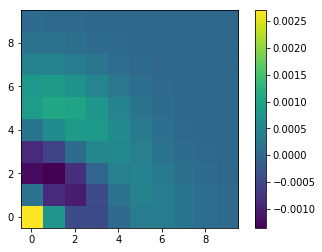

In [238]:
logreg = LogisticRegression(C=0.1, solver='liblinear', penalty='l2')
logreg.fit(X_train, y_train)

inverse_image = np.copy(logreg.coef_).reshape((10,10))
fig, ax = plt.subplots()
cs = ax.imshow(inverse_image, origin='lower')
cbar = fig.colorbar(cs)

4.5551102204408815


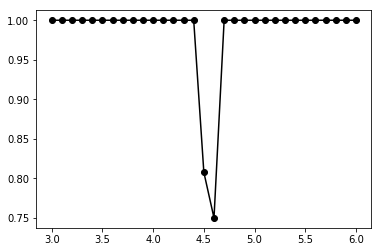

In [221]:
pred = logreg.predict(X_test)
diff = abs(pred-y_test)
TT = np.unique(T_test)
TT = np.round(TT, decimals=3)
avg = np.zeros(len(TT))
acc = np.zeros(len(TT))
for i in np.arange(len(TT)):
    avg[i] = np.mean(pred[np.where(T_test==TT[i])[0]])
    acc[i] = np.mean(1-diff[np.where(T_test==TT[i])[0]])

plt.plot(TT, acc, '-o', c='k')

tRange = np.linspace(4,5,500)
interps = np.interp(tRange, TT, avg)

Tc = tRange[abs(interps-0.5).argmin()]

print(Tc)

In [226]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)

4.388577154308617


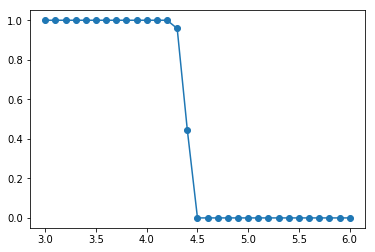

In [229]:
pred = kmeans.predict(X_test)
diff = abs(pred-y_test)
TT = np.unique(T_test)
TT = np.round(TT, decimals=3)
acc = np.zeros(len(TT))
avg = np.zeros(len(TT))
for i in np.arange(len(TT)):
    avg[i] = np.mean(pred[np.where(T_test==TT[i])[0]])
    acc[i] = np.mean(diff[np.where(T_test==TT[i])[0]])

plt.plot(TT, avg, '-o')

tRange = np.linspace(4,4.7,500)
interp = np.interp(tRange, TT, avg)

Tc = tRange[abs(interp-0.5).argmin()]
print(Tc)

In [224]:
pca = PCA(n_components=2)
X_r = pca.fit(imgs1_array).transform(imgs1_array)

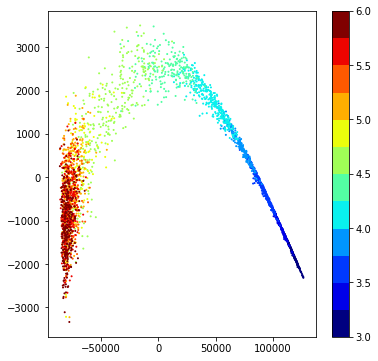

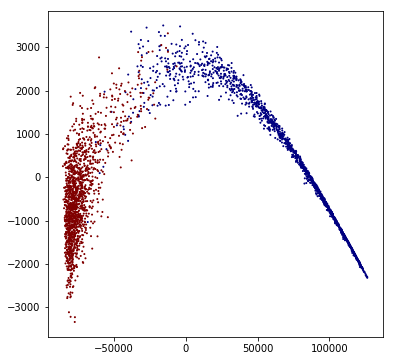

In [225]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(3,6,13)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scat = ax.scatter([elm[0] for elm in X_r],[elm[1] for elm in X_r],c=TPD1list,s=1,cmap=cmap, norm=norm)
cbar = fig.colorbar(scat)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(6,6))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,1,3)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scat = ax.scatter([elm[0] for elm in X_r],[elm[1] for elm in X_r],c=[1-l for l in labels1],s=1,cmap=cmap, norm=norm)
plt.show()